In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data/us_topemployee.csv', var1='logemployee', var2='employee', var3='employee_mean')

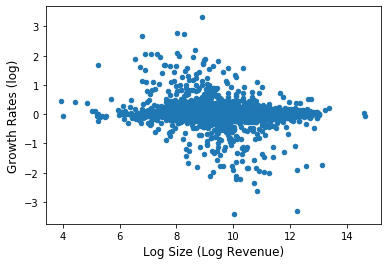

In [3]:
fq.scatterplot(df, x='logemployee', xlabel='Log Size (Log Revenue)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(3.95, 8.795, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(8.795, 9.457, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(9.457, 10.308, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(10.308, 14.648, closed='right') ]

In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([ 0.47, -0.06,  0.42, ...,  0.04,  0.04, -0.01])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

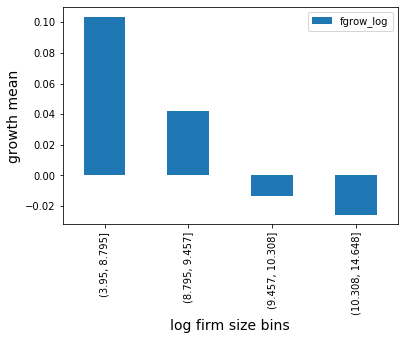

In [6]:
fq.plotbars(df3)

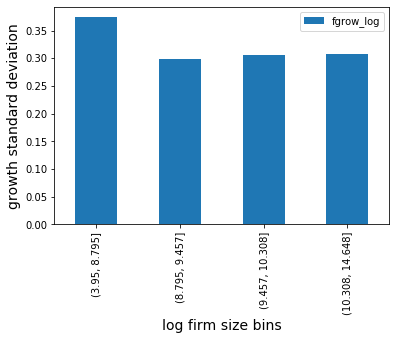

In [7]:
fq.plotbars(df4, xlabel='log firm size bins', ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [8]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [9]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

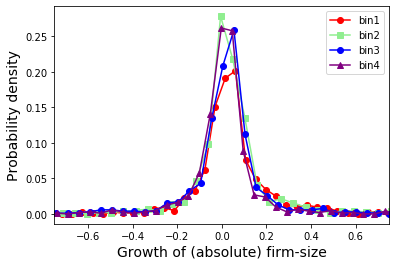

In [10]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [11]:
s_dist1 = df.employee
s_dist2 = df.logemployee
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by employee is

In [12]:
fq.gabaix_est(s_dist1, c=0.01)

2.091365262182631

The tail index for log firm size distribution with firm size measured by employee is

In [13]:
fq.gabaix_est(s_dist2, c=0.01)

28.72246475580597

The tail index for firm growth distribution with firm size measured by employee is

In [14]:
fq.gabaix_est(s_dist3, c=0.01)

4.165822657136545

## 3.3 tail index for firm size distribution yearly from 2015 to 2019

In [15]:
n = 2015
N = 2020
while n <= N:
    x = df[df['year'] == n].employee
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 2015 is 1.231902309764853
Tail index in year 2016 is 5.984774019584544
Tail index in year 2017 is 8.045291671691647
Tail index in year 2018 is 1.2965320745881352
Tail index in year 2019 is 3.875780935187019
None in year 2020


## 3.4 tail index for log firm size distribution yearly from 2015 to 2019

In [16]:
n = 2015
N = 2020
while n <= N:
    x = df[df['year'] == n].logemployee
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 2015 is 16.890648651066936
Tail index in year 2016 is 77.13304053393755
Tail index in year 2017 is 103.30195361256925
Tail index in year 2018 is 17.813037238479076
Tail index in year 2019 is 50.42454976045898
None in year 2020


## 3.5 tail index for firm growth distribution yearly from 2015 to 2019

In [17]:
n = 2015
N = 2019
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 2015 is 5.232201070493097
Tail index in year 2016 is 6.695350582251686
Tail index in year 2017 is 2.9225776516325688
Tail index in year 2018 is 4.846567102926294
Tail index in year 2019 is 1.9604353832194725
